In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df1=pd.read_csv('../input/digit-recognizer/train.csv')
df1.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df1_list = df1.label.tolist()
df1_set = set(df1_list)
df1_set

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [6]:
df2=pd.read_csv('../input/digit-recognizer/test.csv')
df2.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X=df1.drop('label', axis=1)
y=df1['label']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [9]:
X_train=X_train/255
X_test=X_test/255

In [10]:
model = keras.Sequential([
    keras.layers.Dense(200, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
985/985 [==============================] - 3s 2ms/step - loss: 0.3053 - accuracy: 0.9117
Epoch 2/5
985/985 [==============================] - 2s 2ms/step - loss: 0.1314 - accuracy: 0.9610
Epoch 3/5
985/985 [==============================] - 2s 2ms/step - loss: 0.0882 - accuracy: 0.9744
Epoch 4/5
985/985 [==============================] - 3s 3ms/step - loss: 0.0622 - accuracy: 0.9815
Epoch 5/5
985/985 [==============================] - 3s 3ms/step - loss: 0.0456 - accuracy: 0.9863


In [11]:
model.evaluate(X_test, y_test)

329/329 [==============================] - 1s 2ms/step - loss: 0.0974 - accuracy: 0.9693


[0.09739730507135391, 0.9693333506584167]

In [12]:
y_pred = model.predict(X_test)

In [13]:
y_pred[0]

array([2.7157581e-09, 4.4305327e-07, 1.6186522e-06, 9.9999511e-01,
       3.0598656e-11, 1.8854785e-06, 1.1904167e-12, 2.1406007e-11,
       6.7964419e-07, 1.7021773e-07], dtype=float32)

In [14]:
np.argmax(y_pred[8])

7

In [15]:
y_pred_label=[np.argmax(i) for i in y_pred]
y_pred_label[:5]

[3, 5, 6, 9, 1]

In [16]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[1054,    0,    2,    0,    0,    1,    2,    1,    5,    0],
       [   0, 1166,    2,    5,    1,    0,    0,    2,    3,    1],
       [   4,    2,  981,    6,    0,    1,    0,    4,    3,    2],
       [   3,    2,    2, 1085,    0,    7,    1,    4,    6,    2],
       [   2,    3,    2,    2,  941,    1,    8,    3,    1,   15],
       [   3,    0,    0,   30,    1,  878,   11,    0,    9,    4],
       [   6,    2,    0,    0,    5,    2, 1018,    0,    4,    0],
       [   2,    2,    7,    4,    1,    0,    0, 1051,    1,    2],
       [   3,    2,    4,   20,    4,    7,    2,    4, 1010,    2],
       [   6,    0,    2,   18,    6,    3,    0,   25,    7,  994]],
      dtype=int32)>

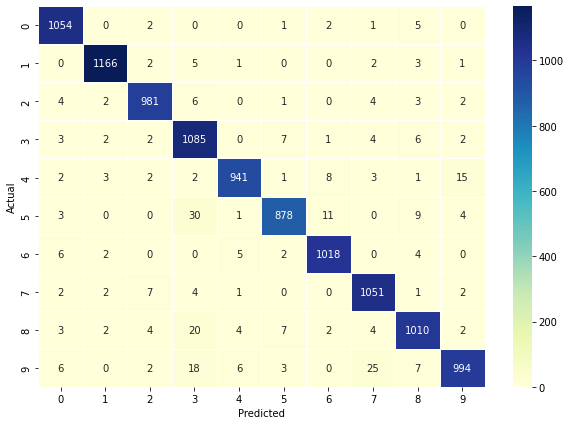

In [17]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True, fmt='d',linewidths=0.5,cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

# Pred

In [18]:
df2=df2/255

In [19]:
pred = model.predict(df2)

In [20]:
pred_label=[np.argmax(i) for i in pred]
pred_label[:5]

[2, 0, 9, 9, 3]

In [21]:
sub=pd.read_csv('../input/digit-recognizer/sample_submission.csv')
sub['Label']=pred_label
sub.to_csv('submission.csv', index=False)